In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size'] = 18

from matplotlib.colors import LogNorm

In [3]:
file = uproot.open("fold_migmatrix.root")

In [4]:
file.keys()

['mig_matrix;1']

In [5]:
file["mig_matrix"]

<TH2D (version 3) at 0x7f746460afd0>

In [6]:
migrmatrix = uproot.open("fold_migmatrix.root:mig_matrix")
print(migrmatrix)

<TH2D (version 3) at 0x7f74202f0b50>


0.0


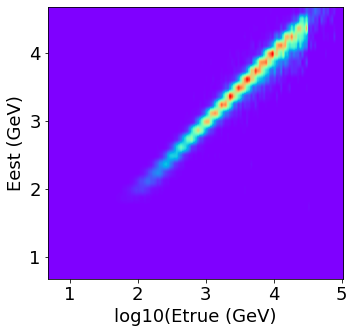

In [21]:
values = migrmatrix.values()
edgesx = migrmatrix.axis("x").edges()
edgesy = migrmatrix.axis("y").edges()
values.shape
plt.imshow(values.T, cmap = "rainbow", origin="lower", extent=[np.log10(edgesx[0]), np.log10(edgesx[-1]), np.log10(edgesy[0]), np.log10(edgesy[-1])])
plt.xlabel('log10(Etrue (GeV)')
plt.ylabel('Eest (GeV)')#comprovar
# plt.xscale('log')
# plt.yscale('log')
print(values[17,17])


In [19]:
print(len(edgesx))
print(len(edgesy))
print(values[:,1].shape)

140
33
(139,)


In [20]:
#Aeff_trueE = uproot.open("Output_flute.root:MHMcCollectionAreaEtrue")
Bckg = uproot.open("Output_flute.root:hEstBckgE")

Bckgval = Bckg.values()
BckgE= Bckg.axis("x").edges()

In [21]:
BckgE

array([4.74274741e+00, 6.32455532e+00, 8.43393007e+00, 1.12468265e+01,
       1.49978842e+01, 2.00000000e+01, 2.66704286e+01, 3.55655882e+01,
       4.74274741e+01, 6.32455532e+01, 8.43393007e+01, 1.12468265e+02,
       1.49978842e+02, 2.00000000e+02, 2.66704286e+02, 3.55655882e+02,
       4.74274741e+02, 6.32455532e+02, 8.43393007e+02, 1.12468265e+03,
       1.49978842e+03, 2.00000000e+03, 2.66704286e+03, 3.55655882e+03,
       4.74274741e+03, 6.32455532e+03, 8.43393007e+03, 1.12468265e+04,
       1.49978842e+04, 2.00000000e+04, 2.66704286e+04, 3.55655882e+04,
       4.74274741e+04])

In [22]:
edgesx

array([4.74274741e+00, 5.09659350e+00, 5.47683927e+00, 5.88545435e+00,
       6.32455532e+00, 6.79641666e+00, 7.30348255e+00, 7.84837952e+00,
       8.43393007e+00, 9.06316728e+00, 9.73935050e+00, 1.04659823e+01,
       1.12468265e+01, 1.20859278e+01, 1.29876326e+01, 1.39566117e+01,
       1.49978842e+01, 1.61168438e+01, 1.73192865e+01, 1.86114408e+01,
       2.00000000e+01, 2.14921566e+01, 2.30956397e+01, 2.48187552e+01,
       2.66704286e+01, 2.86602514e+01, 3.07985305e+01, 3.30963420e+01,
       3.55655882e+01, 3.82190595e+01, 4.10705005e+01, 4.41346814e+01,
       4.74274741e+01, 5.09659350e+01, 5.47683927e+01, 5.88545435e+01,
       6.32455532e+01, 6.79641666e+01, 7.30348255e+01, 7.84837952e+01,
       8.43393007e+01, 9.06316728e+01, 9.73935050e+01, 1.04659823e+02,
       1.12468265e+02, 1.20859278e+02, 1.29876326e+02, 1.39566117e+02,
       1.49978842e+02, 1.61168438e+02, 1.73192865e+02, 1.86114408e+02,
       2.00000000e+02, 2.14921566e+02, 2.30956397e+02, 2.48187552e+02,
      

In [23]:
fileBkg = np.loadtxt('BckgMAGIC.txt', skiprows = 2)
Bkgpd = pd.DataFrame(fileBkg)
Bkgpd = Bkgpd.rename(columns={ 0 : 'E (TeV)',1: 'Bck Rate (Hz)'})

BckgE = Bkgpd['E (TeV)'].to_numpy()
Bckg = Bkgpd['Bck Rate (Hz)'].to_numpy()

In [24]:
print(Bckgval[4:23])
print(Bckg*42480)
print(Bckgval[4:23] - (Bckg*42480))

[1.53333333e+01 1.17666667e+02 1.59333333e+02 8.95666667e+02
 1.53366667e+03 3.07100000e+03 2.45533333e+03 1.37233333e+03
 6.11666667e+02 3.55000000e+02 1.38333333e+02 8.36666667e+01
 4.90000000e+01 3.76666667e+01 1.90000000e+01 1.16666667e+01
 6.66666667e+00 4.66666667e+00 2.66666667e+00]
[1.525032e+01 1.176696e+02 1.584504e+02 8.920800e+02 1.525032e+03
 3.058560e+03 2.451096e+03 1.363608e+03 6.074640e+02 3.534336e+02
 1.376352e+02 8.326080e+01 4.885200e+01 3.755232e+01 1.890360e+01
 1.163952e+01 6.626880e+00 4.630320e+00 2.659248e+00]
[ 8.30133333e-02 -2.93333333e-03  8.82933333e-01  3.58666667e+00
  8.63466667e+00  1.24400000e+01  4.23733333e+00  8.72533333e+00
  4.20266667e+00  1.56640000e+00  6.98133333e-01  4.05866667e-01
  1.48000000e-01  1.14346667e-01  9.64000000e-02  2.71466667e-02
  3.97866667e-02  3.63466667e-02  7.41866667e-03]


In [27]:
migmat = migrmatrix.values()[:,:,0]
migmat = migmat[:, 4:-1]

print(values[5])
print(migmat[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.18747228e-04
 3.03194641e-06 2.76997606e-04 7.30322405e-05 1.94047721e-04
 3.94767030e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [28]:
migrmatrix = uproot.open("Output_flute.root:migrmatrix")
migmat0 = migrmatrix.values()[:,:,0]
migmat1 = migrmatrix.values()[:,4:-1,0]
migmat2 = migmat0[:, 4:-1]
migmat1==migmat2

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True

In [7]:
file = uproot.open("Output_fitebl.root:intrinsic_sed_#19")

In [18]:
file.typenames()
# formula = file.parameter()

AttributeError: 'Model_TF1_v7' object has no attribute 'typenames'

In [8]:
file2 = uproot.open("Output_fitebl.root:Chi2_1ES1011_Feb2014_LP")

In [19]:
file2.values()[0]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ])